# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Experimento multicolinealidad en Árboles de Decisión</center>
### <center> Práctica reducción de dimensionalidad </center>

En esta notebook vamos a analizar el comportamiento de un algoritmo de árbol de decisión frente a multicolinealidad en sus variables para evaluar reducir dimensiones.

#### Links interesantes
 * https://pandas.pydata.org
 * https://scikit-learn.org
 * https://matplotlib.org/
 * https://seaborn.pydata.org/
 * https://towardsdatascience.com/beautiful-decision-tree-visualizations-with-dtreeviz-af1a66c1c180

### Importamos todas las librerías que vamos a necesitar

In [ ]:
pip install 'dtreeviz'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 313 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=23b92a1feb45d0a2f59332b05c0956eaaadaa20aa9e9dced1bbe2e4cac818595
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
Successfully built dtreeviz


In [ ]:
import pandas as pd
import numpy as np

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import dtreeviz.trees as dtreeviz

#modelos y métricas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

### Cargamos el dataset sobre el cual vamos a trabajar

In [ ]:
ds_titanic=pd.read_csv('./datasets/ds_titanic.csv')
ds_trabajo=ds_titanic.copy()

### Análisis exploratorio

Listar la cantidad de filas y columnas que tiene el dataset

In [ ]:
ds_trabajo.shape

(891, 12)

Este dataset contiene 891 filas y 12 columnas

Listar los nombres de las columnas del dataset

In [ ]:
ds_trabajo.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

<b>Descripción de los campos</b><br>
* PassengerId: Identificador del pasajero dentro de la tabla<br>
* Survived: Indica si el pasajero sobrevivió<br>
* Pclass: clase de pasajero primera(1), segunda (2) o tercera (3) <br>
* Name: Nombre del pasajero <br>
* Sex: Sexo del pasajero<br>
* Age: Edad<br>
* SibSp: Cantidad de hermanas/os o esposas/os a bordo<br>
* Parch: Cantidad de padres o hijos a bordo<br>
* Ticket: Número de ticket<br>
* Fare: Tarifa <br>
* Cabin: Cabina en la cual se encuentra alojado el pasajero<br>
* Embarked: Puerta de embarque<br>

Mostrar algunas filas del dataframe

In [ ]:
ds_trabajo.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



<font color='red'>TODO (tarea): </font>
<font color='red'> Un an&aacute;lisis exploratorio de este dataset lo realizamos en clases anteriores, ahora te proponemos continuar esta tarea </font>    

### Preprocesamiento

#### Selección de atributos

Eliminamos algunas columnas que decidimos no utilizar

In [ ]:
columnas_eliminar=['PassengerId','Name',"Ticket"]
ds_trabajo.drop(columnas_eliminar, axis='columns', inplace=True)  #Elimina columna sobre el mismo dataframe
ds_trabajo.columns.tolist()

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Embarked']

#### Datos nulos

Anlizamos la proporcion de datos nulos de cada atributo

In [ ]:
filas_totales=ds_trabajo.shape[0]
print(ds_trabajo.isna().sum()/filas_totales*100)

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64


<font color='blue'>Por esta vez vamos eliminar los valores faltantes. </font><br>
* Debido a la gran cantidad de datos nulos en la variable Cabin se decide eliminarla.<br>
* Para el resto de las variables con datos faltantes se eliminaran las filas que tengan valores nulos en alguna de ellas.

In [ ]:
columnas_eliminar_NANs=['Cabin']
ds_trabajo.drop(columnas_eliminar_NANs, axis='columns', inplace=True)
ds_trabajo.columns.tolist()

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [ ]:
ds_trabajo=ds_trabajo.dropna()
ds_trabajo_limpio=ds_trabajo.copy()

Volvemos a listar la cantidad de Nans

In [ ]:
filas_totales=ds_trabajo.shape[0]
print(ds_trabajo.isna().sum()/filas_totales*100)

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64


In [ ]:
ds_trabajo.shape

(712, 8)

## Experimento

Genero columnas correlacionadas

In [ ]:
import random
  
mu = 0
sigma = 0.5
  
cant_vars_cor=10
nuevas_variables=[]

for i in range(1,cant_vars_cor+1):
  mu=0.2*i
  sigma=0.1*i
  var_cor=[ random.gauss(mu, sigma) for _ in range(0,ds_trabajo.shape[0]) ]  
  nuevas_variables.append(var_cor)

print(nuevas_variables)

0.23162071507625998
[[0.18485557621023438, 0.25809013870144554, 0.14603843671592667, 0.24330020240833666, 0.36137625165264836, 0.20074825103174512, 0.20581159107422128, 0.14586184169019475, 0.13452949381058954, 0.41507183789035823, 0.15243783365823566, 0.12870806376717678, 0.3232700270313102, 0.08722039503282869, 0.2630384781092458, 0.29728831112609055, 0.15283988809587862, 0.222873354653381, 0.25945622446672517, 0.31698209378856657, 0.2135268440156337, 0.21609244339442413, 0.1372757019996934, -0.00741136575154186, 0.1296283244940199, 0.22522730523045217, 0.27438707849051186, 0.07352937154141759, 0.15667423378140585, 0.16764871832804773, 0.1368470738951023, 0.12064409358161321, -0.052243611013384095, 0.22384426575453498, -0.02114371112766117, 0.3425104219882481, 0.20525944802440954, 0.3709072117537212, 0.0711487237652709, 0.4622612859889076, 0.32811354121031866, 0.3059883666983022, 0.22369985635300002, 0.3584375598804261, 0.16486952072156572, 0.2744792260183697, 0.18539709646671734, 0.

In [ ]:
for i in range(1,cant_vars_cor+1):
  nombre_campo="Age_cor_"+str(i)
  print(nombre_campo)
  ds_trabajo[nombre_campo]=ds_trabajo['Age']+nuevas_variables[i-1]

Age_cor_1
Age_cor_2
Age_cor_3
Age_cor_4
Age_cor_5
Age_cor_6
Age_cor_7
Age_cor_8
Age_cor_9
Age_cor_10


In [ ]:
ds_trabajo.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_cor_1,Age_cor_2,Age_cor_3,Age_cor_4,Age_cor_5,Age_cor_6,Age_cor_7,Age_cor_8,Age_cor_9,Age_cor_10
0,0,3,male,22.0,1,0,7.2500,S,22.184856,22.317564,22.455786,22.467179,23.017929,23.487298,22.477227,22.131883,22.754470,24.406244
1,1,1,female,38.0,1,0,71.2833,C,38.258090,38.212833,38.178835,38.458637,39.350539,39.643044,40.314514,39.089530,40.157852,41.606704
2,1,3,female,26.0,0,0,7.9250,S,26.146038,26.225545,26.639383,27.071613,27.947460,27.745773,27.159838,25.949228,26.912422,27.890950
3,1,1,female,35.0,1,0,53.1000,S,35.243300,35.352432,35.701724,35.538919,36.172479,36.526320,35.843184,36.803275,36.161196,37.532876
4,0,3,male,35.0,0,0,8.0500,S,35.361376,35.570099,35.673660,36.246086,36.619913,34.811919,35.836337,35.008110,36.722417,40.047484


Vemos la correlación resultante en el nuevo dataset

In [ ]:
ds_trabajo.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_cor_1,Age_cor_2,Age_cor_3,Age_cor_4,Age_cor_5,Age_cor_6,Age_cor_7,Age_cor_8,Age_cor_9,Age_cor_10
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100,-0.082174,-0.083357,-0.083249,-0.080738,-0.083464,-0.082863,-0.080552,-0.084293,-0.083082,-0.088122
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893,-0.365644,-0.365443,-0.365357,-0.366613,-0.364012,-0.368181,-0.365499,-0.365307,-0.367382,-0.361115
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143,0.999977,0.999908,0.999778,0.999614,0.999378,0.999186,0.998765,0.998534,0.997987,0.997740
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860,-0.307511,-0.306642,-0.306741,-0.306084,-0.307146,-0.306771,-0.306235,-0.307748,-0.307535,-0.303830
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624,-0.187977,-0.187911,-0.189540,-0.186727,-0.185329,-0.187872,-0.188337,-0.188346,-0.185845,-0.187468
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000,0.092720,0.093087,0.092703,0.094037,0.091225,0.096930,0.092257,0.093537,0.093643,0.089807
Age_cor_1,-0.082174,-0.365644,0.999977,-0.307511,-0.187977,0.092720,1.000000,0.999882,0.999754,0.999595,0.999367,0.999151,0.998729,0.998534,0.997933,0.997717
Age_cor_2,-0.083357,-0.365443,0.999908,-0.306642,-0.187911,0.093087,0.999882,1.000000,0.999708,0.999516,0.999276,0.999126,0.998675,0.998428,0.997930,0.997667
Age_cor_3,-0.083249,-0.365357,0.999778,-0.306741,-0.189540,0.092703,0.999754,0.999708,1.000000,0.999403,0.999145,0.998996,0.998513,0.998318,0.997775,0.997487
Age_cor_4,-0.080738,-0.366613,0.999614,-0.306084,-0.186727,0.094037,0.999595,0.999516,0.999403,1.000000,0.999029,0.998805,0.998420,0.998122,0.997603,0.997356


### Entrenamiento y Predicción

Continuamos trabajando con un dataset de 712 filas y todas las variables

In [ ]:
#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_x=ds_trabajo.drop(['Survived'], axis='columns', inplace=False)

#Creo un dataset con la variable target
ds_trabajo_y = ds_trabajo['Survived'].copy()

#Genero los conjuntos de train y de test
x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x,
                                                    ds_trabajo_y, 
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2) #semilla

In [ ]:
#One hot encoding para variables categoricas
ds_trabajo = pd.get_dummies(ds_trabajo, columns=["Pclass","Sex","Embarked"], drop_first=True)
ds_trabajo.head()

,Survived,Age,SibSp,Parch,Fare,Age_cor_1,Age_cor_2,Age_cor_3,Age_cor_4,Age_cor_5,Age_cor_6,Age_cor_7,Age_cor_8,Age_cor_9,Age_cor_10,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,22.184856,22.317564,22.455786,22.467179,23.017929,23.487298,22.477227,22.131883,22.754470,24.406244,0,1,1,0,1
1,1,38.0,1,0,71.2833,38.258090,38.212833,38.178835,38.458637,39.350539,39.643044,40.314514,39.089530,40.157852,41.606704,0,0,0,0,0
2,1,26.0,0,0,7.9250,26.146038,26.225545,26.639383,27.071613,27.947460,27.745773,27.159838,25.949228,26.912422,27.890950,0,1,0,0,1
3,1,35.0,1,0,53.1000,35.243300,35.352432,35.701724,35.538919,36.172479,36.526320,35.843184,36.803275,36.161196,37.532876,0,0,0,0,1
4,0,35.0,0,0,8.0500,35.361376,35.570099,35.673660,36.246086,36.619913,34.811919,35.836337,35.008110,36.722417,40.047484,0,1,1,0,1


#### Divisi&oacute;n Train - Test

In [ ]:
#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_x=ds_trabajo.drop(['Survived'], axis='columns', inplace=False)

#Creo un dataset con la variable target
ds_trabajo_y = ds_trabajo['Survived'].copy()

#Genero los conjuntos de train y test
x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x, 
                                                    ds_trabajo_y, 
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2) #semilla

In [ ]:
x_train.head()

,Age,SibSp,Parch,Fare,Age_cor_1,Age_cor_2,Age_cor_3,Age_cor_4,Age_cor_5,Age_cor_6,Age_cor_7,Age_cor_8,Age_cor_9,Age_cor_10,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
52,49.0,1,0,76.7292,49.071149,49.538555,50.087209,48.935729,49.240196,51.171784,49.871853,50.780979,51.008375,49.795268,0,0,0,0,0
366,60.0,1,0,75.2500,60.239141,60.320161,60.808048,60.199116,60.831386,61.434593,60.238919,61.497996,60.821775,61.655926,0,0,0,0,0
802,11.0,1,2,120.0000,11.138720,11.217045,11.335865,11.367713,11.351646,11.351674,13.244191,13.687270,13.068317,10.741015,0,0,1,0,1
184,4.0,0,2,22.0250,4.028960,4.206073,4.646805,4.974029,4.552856,5.530694,6.281326,4.692759,6.251040,5.185475,0,1,0,0,1
71,16.0,5,2,46.9000,16.346131,16.398994,16.354687,17.318927,16.531863,17.392408,16.871573,17.513182,18.253813,18.588003,0,1,0,0,1


In [ ]:
y_train.head()

52     1
366    1
802    1
184    1
71     0
Name: Survived, dtype: int64

Elegimos una cantidad de max_depth para probar

In [ ]:
#Creamos un clasificador con hiperparámetros 
tree_model = tree.DecisionTreeClassifier(criterion="entropy",
                                         max_depth = 20, 
                                         min_samples_leaf=10) 
#Entrenamos el modelo
model = tree_model.fit(X = x_train, y = y_train)

<font color='red'>TODO (tarea): </font>
<font color='red'> probar con criterion="gini"  </font>    

In [ ]:
#Realizamos una predicción sobre el set de test
y_pred = model.predict(x_test)
#Valores Predichos
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
#Valores Reales
y_test.values

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

,test,pred
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0


Text(33.0, 0.5, 'True')

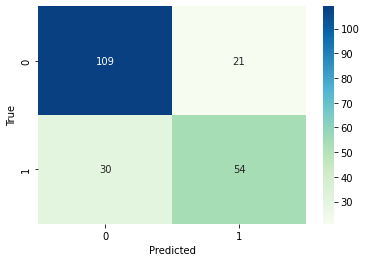

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred,)
f1=f1_score(y_test,y_pred,)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))

Accuracy: 0.7616822429906542
Recall: 0.6428571428571429
f1 score: 0.6792452830188679


#### Graficamos el árbol

In [ ]:
plt.figure(figsize=(100,100))

tree_plot_completo=tree.plot_tree(model,
                                 feature_names=ds_trabajo_x.columns.to_list(),
                                 filled=True,
                                 rounded=True,
                                 class_names=['Not Survived','Survived']) #model.classes_
plt.show(tree_plot_completo)

Output hidden; open in https://colab.research.google.com to view.

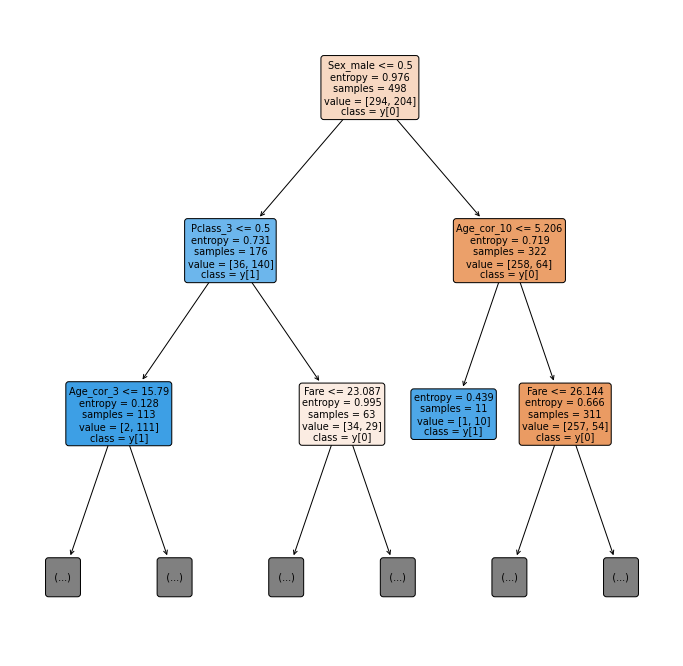

In [ ]:
plt.figure(figsize=(12,12))

tree_plot=tree.plot_tree(model,
                         max_depth=2,
                         feature_names=ds_trabajo_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

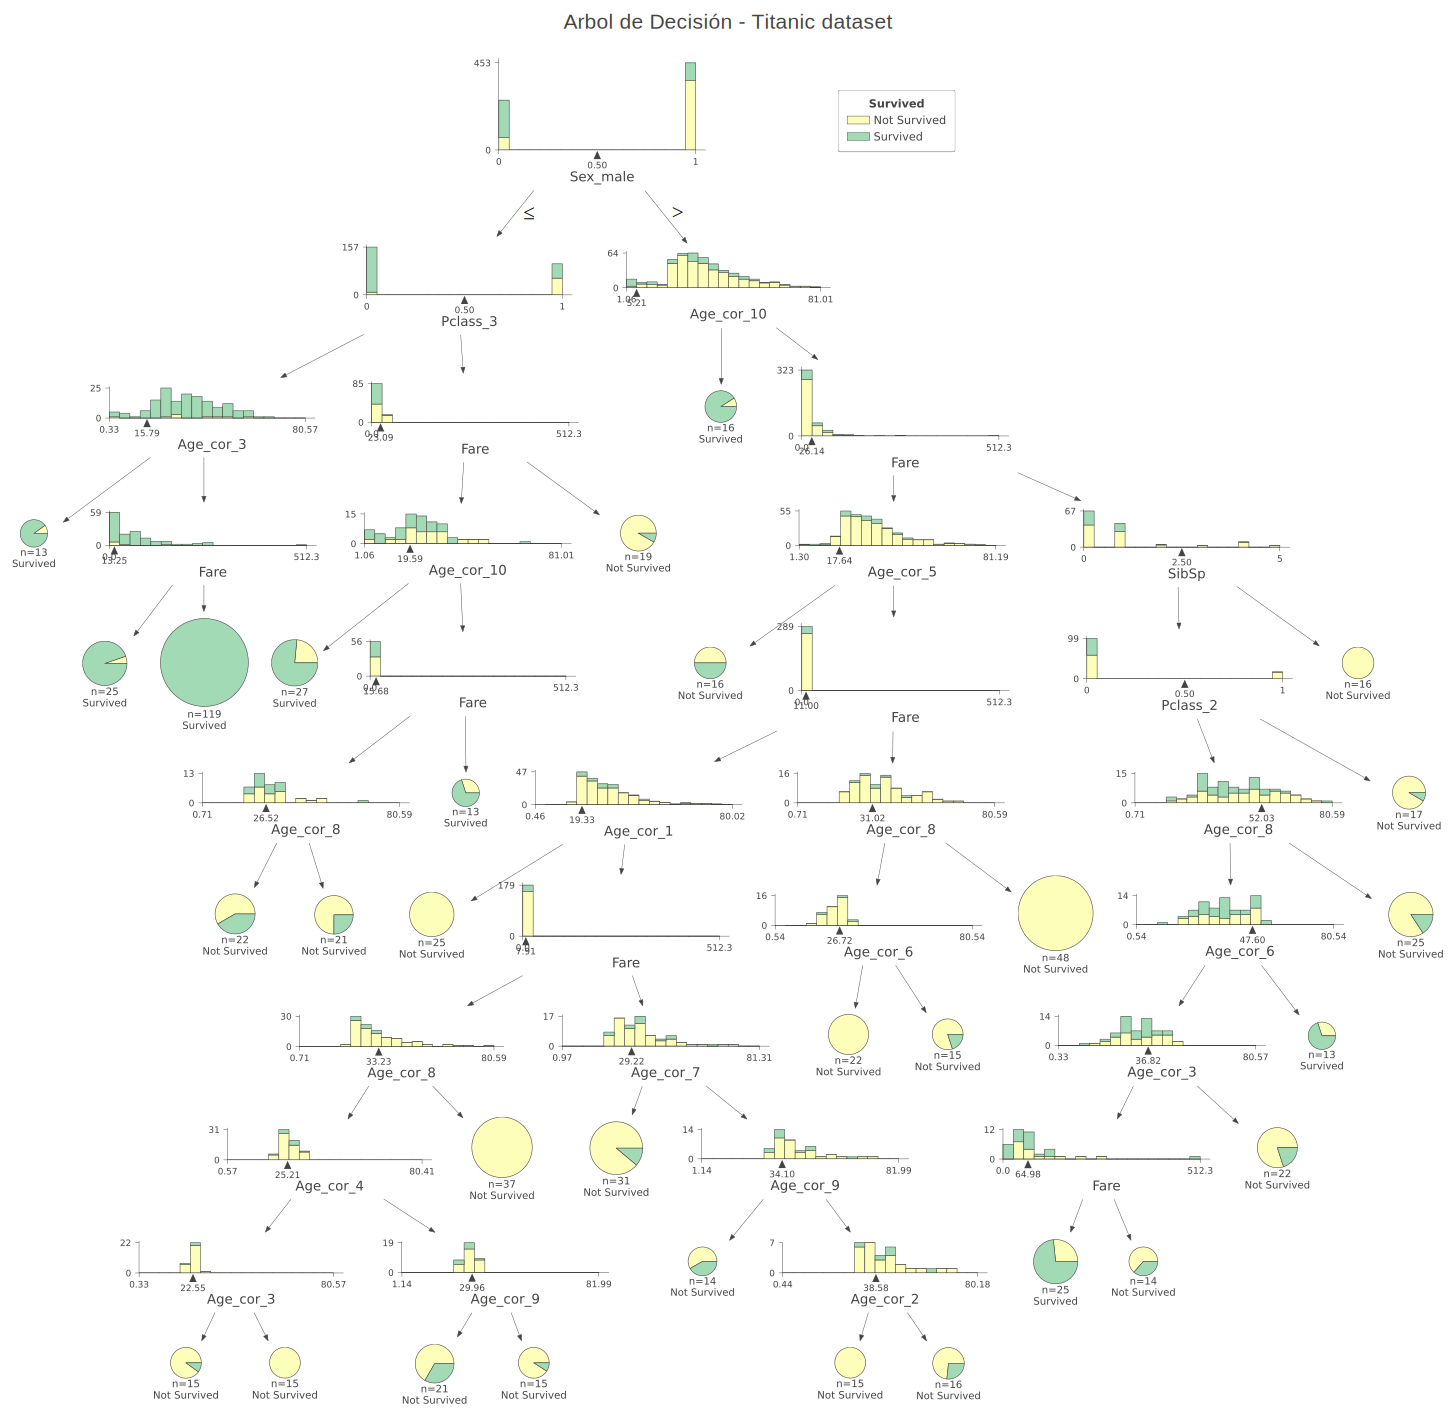

In [ ]:
viz = dtreeviz.dtreeviz(
    model,
    ds_trabajo_x,
    ds_trabajo_y,
    class_names=['Not Survived','Survived'], 
    title="Arbol de Decisión - Titanic dataset",
    target_name='Survived',
    feature_names=ds_trabajo_x.columns.to_list(),
    scale=1.5
)

display(viz)

#### Importancia de atributos

La documentación dice:

feature importances : ndarray of shape (nfeatures,)<br>
The higher, the more important the feature. <br>
The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. <br>
It is also known as the Gini importance.<br>

feature importances : ndarray of shape (nfeatures,)<br>
Cuanto más alto, más importante es la característica.<br>
La importancia de una característica se calcula como la reducción total (normalizada) del criterio aportado por esa característica.<br>
También se conoce como la importancia de Gini.<br>

In [ ]:
sorted(list(zip(ds_trabajo_x.columns.to_list(), model.feature_importances_)), key=lambda x: -x[1])

[('Sex_male', 0.43568473599701857),
 ('Pclass_3', 0.17797383233058123),
 ('Fare', 0.11013723921573755),
 ('Age_cor_10', 0.08069552983323418),
 ('Age_cor_8', 0.04247125790923007),
 ('SibSp', 0.025839110592866414),
 ('Age_cor_3', 0.024815395350349417),
 ('Age_cor_5', 0.024131650502501014),
 ('Age_cor_6', 0.016572906360674964),
 ('Pclass_2', 0.013584990050551802),
 ('Age_cor_9', 0.013158005678774483),
 ('Age_cor_2', 0.012299878949635691),
 ('Age_cor_4', 0.0102143646189033),
 ('Age_cor_1', 0.00911415452545544),
 ('Age_cor_7', 0.003306948084485943),
 ('Age', 0.0),
 ('Parch', 0.0),
 ('Embarked_Q', 0.0),
 ('Embarked_S', 0.0)]